# Demo: Exporting a Linear Regression Model

This is just an example of how we might generate 

Estimate a regression model that can be exported to a binary format.
The model object can be exported from the notebook (by pickling it), and consumed in the context of another application.

### Just learning about the dataset

Before we do any stats we'll want to explore the dataset to find any issues that might come up when picking a model.

This might be something like:
- Multicollinearity
- Heteroskedasticity
- Sparse data (which might require imputation)

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pickle


In [46]:
dataset = pd.read_csv('kc_house_data.csv')

In [47]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [48]:
dataset.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

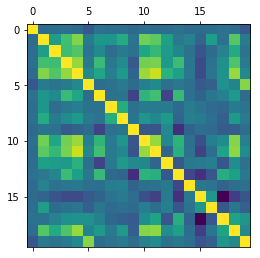

In [49]:
# determine multicollinearity

plt.matshow(dataset.corr())
plt.show()

In [50]:
dataset.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


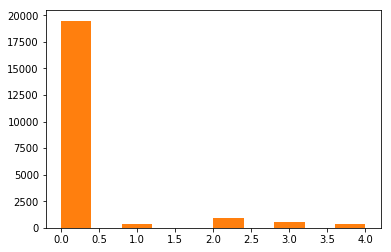

In [66]:
plt.hist(dataset['view'])
plt.show()

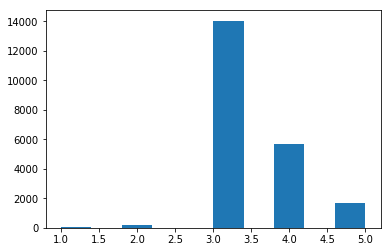

In [67]:
plt.hist(dataset['condition'])
plt.show()

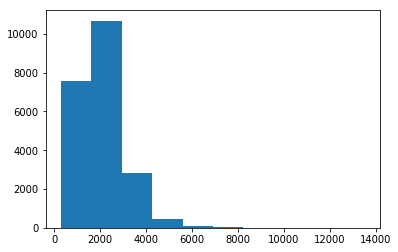

In [68]:
plt.hist(dataset['sqft_living'])
plt.show()

### Fit a Model and Test on a Holdout Sample.

In [51]:
# create two subsets of samples.

dataset_train, dataset_test = train_test_split(dataset, test_size=0.2, train_size=0.8)

In [52]:
dataset_train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
13391,3343901848,20150408T000000,313100.0,3,2.0,1720,11875,1.0,0,0,...,6,1720,0,1905,0,98056,47.5068,-122.191,1860,7500
13571,1026069061,20150129T000000,682000.0,4,2.5,3600,203425,2.0,0,0,...,9,3400,200,1979,0,98077,47.7597,-122.018,3150,202989
10826,3709500060,20140620T000000,458000.0,3,2.5,1870,5013,2.0,0,0,...,8,1870,0,2003,0,98011,47.7552,-122.221,2040,5555
3176,6141100750,20141008T000000,389000.0,3,1.0,1380,6591,1.0,0,0,...,7,1380,0,1947,0,98133,47.7164,-122.351,1610,6594
16190,4137000280,20150222T000000,264500.0,3,2.5,1630,8346,1.0,0,0,...,8,1630,0,1990,0,98092,47.2622,-122.219,2110,8619


In [53]:
dataset_test.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17380,3793500050,20150303T000000,310000.0,3,2.50,1890,6300,2.0,0,0,...,7,1890,0,2003,0,98038,47.3673,-122.031,2100,6525
4990,6071900130,20150415T000000,550000.0,3,1.75,1670,10798,1.0,0,0,...,8,1670,0,1962,0,98006,47.5490,-122.170,2290,10798
15532,1245000500,20141103T000000,750500.0,4,2.50,2860,9159,1.0,0,0,...,8,1530,1330,1989,0,98033,47.6923,-122.200,2070,8680
6585,1099600250,20141202T000000,260000.0,3,1.75,1710,6400,1.0,0,0,...,7,1240,470,1976,0,98023,47.3036,-122.377,1600,6400
8774,1925069199,20150209T000000,835000.0,3,2.50,2720,13124,2.0,0,0,...,9,2720,0,1988,0,98052,47.6371,-122.094,2760,16200


In [54]:
train_y = dataset_train[['price']]
test_y = dataset_test[['price']]

In [55]:
# this seemed like a reasonable set of variables without too much in the way of correlation between them...

train_X = dataset_train[['sqft_living', 'view', 'condition']]
test_X = dataset_test[['sqft_living', 'view', 'condition']]

In [56]:
model = LinearRegression()

In [57]:
model.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [59]:
# get R-squared for the model.

model.score(test_X, test_y)

0.54508686101794135

### Export the Estimated Model for Later Use

Having estimated a reasonable model, we might want to use it online, without having to reimplement the model altogether in a separate environment.

We do that by pickling it.


In [64]:
model_file = open('model.p', mode='wb')
pickle.dump(model, model_file)
model_file.flush()